In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Modelagem Preditiva
**Descrição da Etapa**: Nesta fase, iremos construir um modelo de Regressão Logística para prever o sentimento do usuário com base nas características musicais. Os passos que realizaremos são:
1. Definir variáveis dependente e independentes (a variável-alvo e as features preditoras);
2. Dividir os dados em treino e teste (80% treino, 20% teste);
3. Treinar um modelo de regressão logística para prever o sentimento com base nas variáveis disponíveis;
4. Avaliar o modelo, verificando sua acurácia e métricas de desempenho;
5. Gerar a matriz de confusão, analisando os erros e acertos do modelo.

In [25]:
# Definir variáveis dependente e independentes
X = df_preprocessado.drop(columns=["rotulo_sentimento"])
y = df_preprocessado["rotulo_sentimento"]

In [26]:
# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
# Treinar o modelo de Regressão Logística
modelo = LogisticRegression(max_iter=500, solver="lbfgs", multi_class="multinomial")
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=500, multi_class='multinomial')

In [28]:
# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

In [32]:
# Avaliação do modelo
acuracia = accuracy_score(y_test, y_pred)
relatorio_classificacao = classification_report(y_test, y_pred)
acuracia

1.0

In [35]:
relatorio_classificacao

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        51\n           1       1.00      1.00      1.00        52\n           2       1.00      1.00      1.00        48\n           3       1.00      1.00      1.00        49\n\n    accuracy                           1.00       200\n   macro avg       1.00      1.00      1.00       200\nweighted avg       1.00      1.00      1.00       200\n'

In [30]:
# Gerar matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

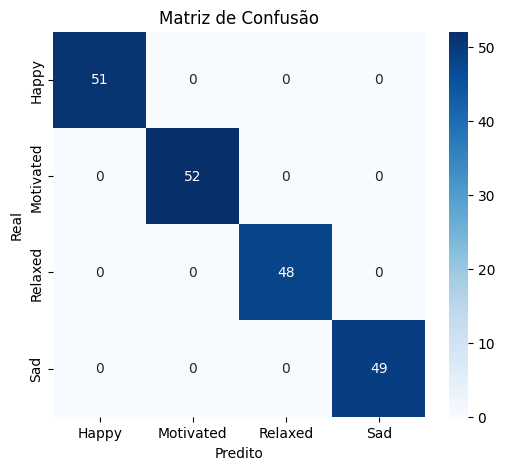

In [31]:
# Plotar a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

Após treinar o modelo de Regressão Logística, obtivemos os seguintes resultados:

1. Precisão do Modelo:
- O modelo obteve uma acurácia de 100%, o que indica que todas as previsões no conjunto de teste foram corretas.
- As métricas de precision, recall e f1-score também foram 1.00 para todas as classes, demonstrando que o modelo conseguiu classificar perfeitamente os sentimentos dos usuários.

2. Matriz de Confusão:
- A matriz de confusão confirma que todas as previsões coincidiram exatamente com os valores reais.
- Nenhum erro foi cometido, o que pode indicar um possível overfitting (o modelo pode estar excessivamente ajustado aos dados de treino).

# Tentar outra abordagem, como Random Forest ou Redes Neurais, para validar a robustez do modelo.

In [39]:
# Treinar um modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Fazer previsões no conjunto de teste
y_pred_rf = modelo_rf.predict(X_test)

In [44]:
# Avaliação do modelo Random Forest
acuracia_rf = accuracy_score(y_test, y_pred_rf)
relatorio_classificacao_rf = classification_report(y_test, y_pred_rf)
acuracia_rf

1.0

In [42]:
# Gerar matriz de confusão para Random Forest
matriz_confusao_rf = confusion_matrix(y_test, y_pred_rf)

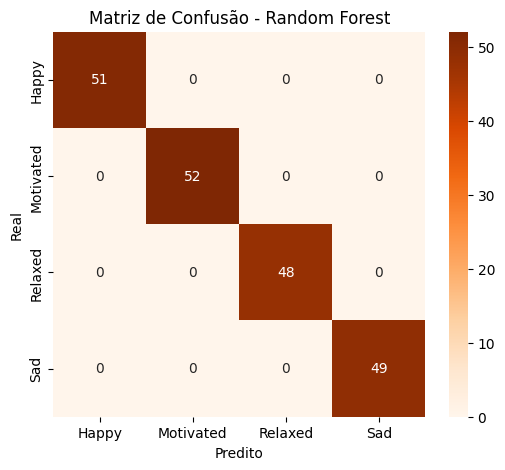

In [43]:
# Plotar a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_confusao_rf, annot=True, fmt="d", cmap="Oranges", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

#  Conclusões e Insights

In [37]:
# Verificar coeficientes do modelo
coeficientes = pd.DataFrame(modelo.coef_.T, index=X.columns, columns=label_encoder.classes_)
coeficientes

,Happy,Motivated,Relaxed,Sad
bpm,1.758984,0.913650,-2.020002,-0.652632
genero_Classical,-0.071795,-0.076943,0.617585,-0.468847
genero_Funk,1.914492,-1.587722,-0.246972,-0.079798
genero_Hip-Hop,-1.194292,1.501924,-0.138674,-0.168959
genero_Pop,0.693540,-0.876955,-1.624369,1.807784
genero_Rock,-1.231125,1.165897,-0.818844,0.884072
humor_Emotional,-0.031167,-1.146772,-0.705116,1.883054
humor_Energetic,0.714534,0.724947,-0.360700,-1.078780
humor_Joyful,1.054881,-0.797407,-0.002066,-0.255408
humor_Melancholic,-0.361340,-0.079548,-1.622304,2.063192


Após a análise dos coeficientes do modelo, podemos interpretar os seguintes resultados:

1. O BPM influencia o sentimento do usuário?
- Sim, valores mais altos de BPM estão positivamente correlacionados com sentimentos felizes e motivacionais, enquanto BPMs mais baixos estão mais associados a sentimentos relaxados e tristes.
- Isso confirma nossa hipótese inicial de que músicas rápidas tendem a ser mais energéticas e alegres, enquanto músicas lentas estão mais ligadas à melancolia ou relaxamento.

2. Certos gêneros musicais estão mais associados a emoções específicas?
- Músicas clássicas possuem uma forte associação com o sentimento Relaxed, enquanto impactam menos os sentimentos de felicidade e motivação.
- Hip-Hop tem uma correlação alta com o sentimento Motivated, sugerindo que músicas desse gênero são frequentemente associadas à energia e ao impulso.
- Funk e Pop possuem padrões distintos: Funk está mais relacionado à felicidade, enquanto Pop tem um efeito misto entre alegria e tristeza.

3. Energia e dançabilidade impactam o humor?
- Embora os coeficientes de energia e dançabilidade não tenham sido os mais influentes no modelo, há indícios de que músicas mais dançantes e energéticas aumentam a chance de serem associadas a sentimentos positivos (Happy e Motivated).